# Dataset Exploration - Stage 2
This Jupyter Notebook was created after the Dataset preparation stage that has occured in the previous notebook. The purpose of this notebook is for exploring and analysing the EuroSAT Sentinel-2 dataset. The dataset exploration notebook has the following sections:
1. The **importing** of the necessary librares including os, numpy, rasterio, matplotlib, seaborn and PIL
2. Getting the **File count** and performing **Distribution analysis**
3. Visualizing the **File Distribution** and **Percentage Distribution** by category using a Bar Chart and Pie Chart.
4. **Collecting and Displaying** Sample Images from Each category
5. **Processing** the Raster Images and **Visualising** the RGB Channels and True Color Composites of the images
6. **Normalising, Storing and Visualising** the RGB Bands from the Raster Images
7. Normalising the Bands themselves and Processing the Rasters

### Importing Necessary Libraries

In [1]:
# Import necessary libraries and modules
import warnings  # To handle warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

import os  # For file and directory operations
import numpy as np  # For numerical operations
import rasterio  # For reading and writing geospatial raster data
from rasterio.plot import show, show_hist, reshape_as_image  # For visualizing raster data
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced data visualization
from PIL import Image  # For image processing using the Pillow library

# Configure matplotlib for inline plotting in Jupyter notebooks
%matplotlib inline
sns.set(style="white")  # Set seaborn style for the plots

### Setting Default Path and Printing the Categories

In [2]:
# Set the path to the datasets directory
path = "C:/Users/isaac/datasets/eurosat-dataset"

# get names of label folders excluding 'dataset_splits'
categories = []
for (dirpath, dirnames, filenames) in os.walk(path):
    if 'dataset_splits' in dirnames:
        dirnames.remove('dataset_splits')  # Exclude 'land-use-jpeg' directory
    categories.extend(dirnames)

print(categories)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


### Getting File Count and Performing Distribution Analysis

In [3]:
# Initialize variables
total = 0
len_categories = {}

# Iterate through each category and count the number of files
for category in categories:
    category_path = os.path.join(path, category)
    try:
        len_files = len(os.listdir(category_path))
        total += len_files
        len_categories[category] = len_files
    except FileNotFoundError:
        print(f"Folder '{category_path}' not found.")
    except Exception as e:
        print(f"Error accessing '{category_path}': {e}")

# Print total number of files and the count per category
print(f"Total number of files: {total}")
print(len_categories)

# Calculate the percentage of files in each category
percentage_categories = {category: (count / total) * 100 for category, count in len_categories.items()}

print()
# Print percentage of files in each category
print("Percentage of files in each category:")
for category, percentage in percentage_categories.items():
    print(f"{category}: {percentage:.2f}%")

print()
# Summary statistics
print("Summary statistics for the number of files per category:")
category_counts = list(len_categories.values())
print(f"Mean: {np.mean(category_counts):.2f}")
print(f"Median: {np.median(category_counts):.2f}")
print(f"Standard Deviation: {np.std(category_counts):.2f}")
print(f"Minimum: {np.min(category_counts)}")
print(f"Maximum: {np.max(category_counts)}")

Total number of files: 13500
{'AnnualCrop': 1500, 'Forest': 1500, 'HerbaceousVegetation': 1500, 'Highway': 1250, 'Industrial': 1250, 'Pasture': 1000, 'PermanentCrop': 1250, 'Residential': 1500, 'River': 1250, 'SeaLake': 1500}

Percentage of files in each category:
AnnualCrop: 11.11%
Forest: 11.11%
HerbaceousVegetation: 11.11%
Highway: 9.26%
Industrial: 9.26%
Pasture: 7.41%
PermanentCrop: 9.26%
Residential: 11.11%
River: 9.26%
SeaLake: 11.11%

Summary statistics for the number of files per category:
Mean: 1350.00
Median: 1375.00
Standard Deviation: 165.83
Minimum: 1000
Maximum: 1500


### Bar chart of File Distributon By Category

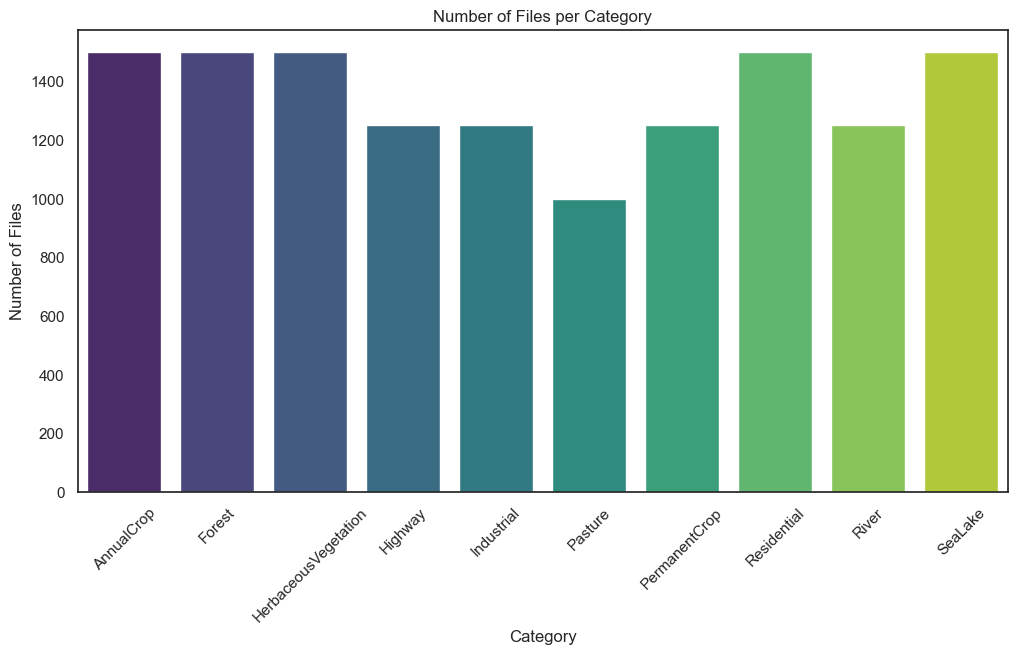

In [4]:
# Visualize the distribution of files across categories
plt.figure(figsize=(12, 6))
sns.barplot(x=list(len_categories.keys()), y=list(len_categories.values()), palette='viridis')
plt.title('Number of Files per Category')
plt.xlabel('Category')
plt.ylabel('Number of Files')
plt.xticks(rotation=45)
plt.show()

### Pie Chart of Percentage Distribution by Category

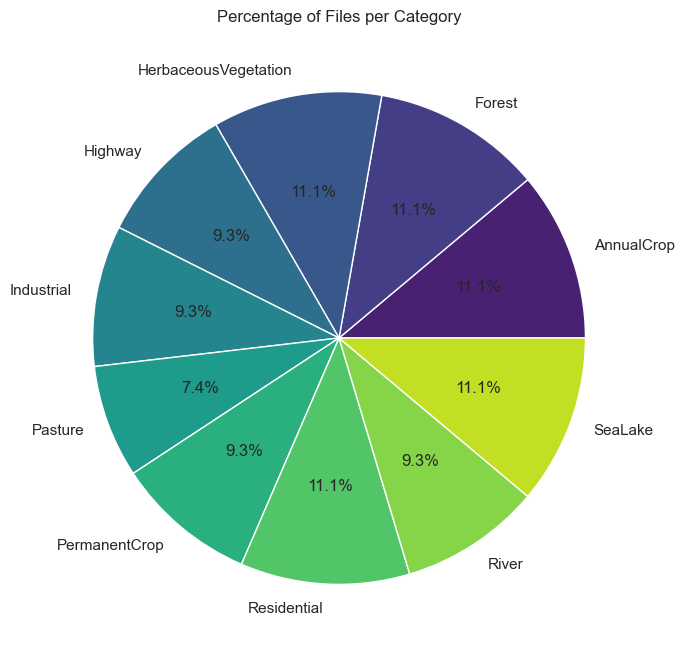

In [5]:
# Visualize the percentage distribution of files across categories using a pie chart
plt.figure(figsize=(10, 8))
plt.pie(list(percentage_categories.values()), labels=list(percentage_categories.keys()), autopct='%1.1f%%', colors=sns.color_palette('viridis', len(categories)))
plt.title('Percentage of Files per Category')
plt.show()

### Collecting and Displaying Sample Images from Each Category

Image path: C:/Users/isaac/datasets/eurosat-dataset\dataset_splits\train\AnnualCrop\AnnualCrop_10.jpeg
Image path: C:/Users/isaac/datasets/eurosat-dataset\dataset_splits\train\Forest\Forest_1.jpeg
Image path: C:/Users/isaac/datasets/eurosat-dataset\dataset_splits\train\HerbaceousVegetation\HerbaceousVegetation_1.jpeg
Image path: C:/Users/isaac/datasets/eurosat-dataset\dataset_splits\train\Highway\Highway_10.jpeg
Image path: C:/Users/isaac/datasets/eurosat-dataset\dataset_splits\train\Industrial\Industrial_1.jpeg
Image path: C:/Users/isaac/datasets/eurosat-dataset\dataset_splits\train\Pasture\Pasture_100.jpeg
Image path: C:/Users/isaac/datasets/eurosat-dataset\dataset_splits\train\PermanentCrop\PermanentCrop_1002.jpeg
Image path: C:/Users/isaac/datasets/eurosat-dataset\dataset_splits\train\Residential\Residential_1000.jpeg
Image path: C:/Users/isaac/datasets/eurosat-dataset\dataset_splits\train\River\River_1.jpeg
Image path: C:/Users/isaac/datasets/eurosat-dataset\dataset_splits\train\S

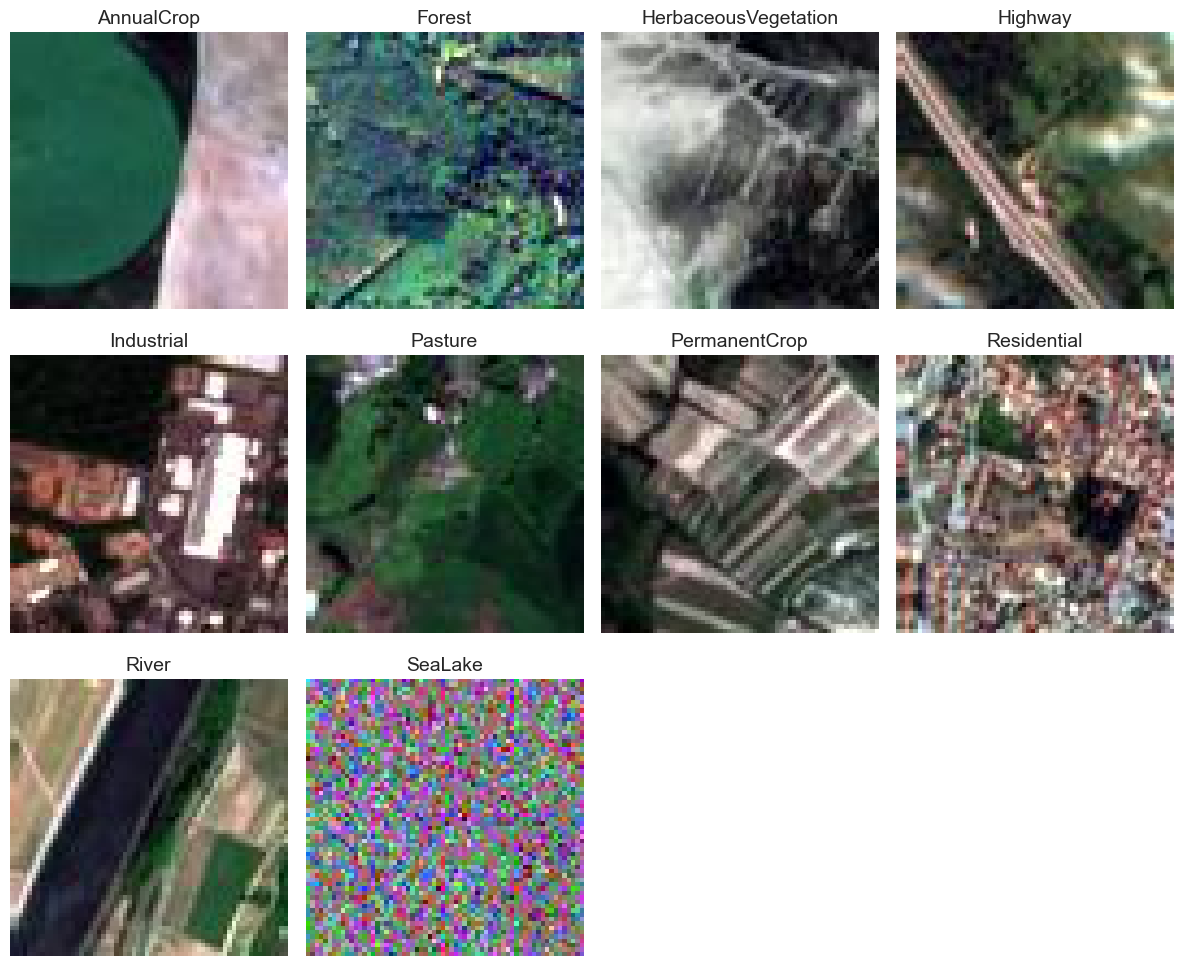

In [6]:
# List to store the image paths
image_paths = []

# Iterate over each category
for category in categories:
    # Construct the directory path for the current category
    category_path = os.path.join(path, 'dataset_splits', 'train', category)
    
    # Check if the directory exists
    if not os.path.exists(category_path):
        print(f"Directory not found: {category_path}")
        continue
    
    # Get a list of files in the directory
    files = os.listdir(category_path)
    
    # Filter out only files with .jpeg extension (adjust as per your actual file extension)
    jpeg_files = [file for file in files if file.lower().endswith('.jpeg')]
    
    # Sort files to ensure consistent selection of the first image
    jpeg_files.sort()
    
    # Check if there are any JPEG files in the directory
    if len(jpeg_files) > 0:
        # Construct the full path of the first image in the category
        first_image_path = os.path.join(category_path, jpeg_files[0])
        image_paths.append(first_image_path)
    else:
        print(f"No JPEG files found in directory: {category_path}")

# Print all collected image paths
for img_path in image_paths:
    print(f"Image path: {img_path}")

# Create a figure to display the images
plt.figure(figsize=(12, 10))

# Iterate over each image path
for i, img_path in enumerate(image_paths, start=1):
    # Normalize the path (optional, for display purposes)
    img_path = os.path.normpath(img_path)
    
    # Split the file path
    parts = img_path.split(os.sep)
    
    # Extract the category label, which is the second-to-last part of the file path
    category = parts[-2]
    
    plt.subplot(3, 4, i)
    
    try:
        # Check if the file exists
        if not os.path.exists(img_path):
            raise FileNotFoundError(f"File {img_path} not found")
        
        # Open the image with Pillow (PIL)
        with Image.open(img_path) as img:
            data = np.array(img)  # Convert image to numpy array
            plt.imshow(data)  # Display the image
    except FileNotFoundError as e:
        print(f"Error reading {img_path}: {e}")
        continue
    except Exception as e:
        print(f"Error reading {img_path}: {e}")
        continue

    plt.axis('off')  # Turn off axis
    plt.title(category, fontsize=14)  # Set title with category name

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

### Reading and Processing Raster Images

In [7]:
# List to store raster objects
rasters = []

# Iterate over each image path
for img_path in image_paths:
    # Extract category from the image path
    category = img_path.split(os.sep)[-2]
    
    # Print category as header
    print(f"Category: {category}")
    
    # Open the image with rasterio
    with rasterio.open(img_path) as raster:
        # Print raster metadata
        print('Height:', raster.height)
        print('Width:', raster.width)
        print('Number of bands:', raster.count)
        print()  # Blank line for separation

        # Read RGB bands
        red = raster.read(1)  # Assuming band 1 is red
        green = raster.read(2)  # Assuming band 2 is green
        blue = raster.read(3)  # Assuming band 3 is blue
        
        # Stack bands together for true color image
        true_color_image = np.stack((red, green, blue), axis=-1)
        
        # Store raster and bands in the list
        rasters.append({
            'raster': raster,
            'true_color_image': true_color_image,
            'img_path': img_path
        })

Category: AnnualCrop
Height: 64
Width: 64
Number of bands: 3

Category: Forest
Height: 64
Width: 64
Number of bands: 3

Category: HerbaceousVegetation
Height: 64
Width: 64
Number of bands: 3

Category: Highway
Height: 64
Width: 64
Number of bands: 3

Category: Industrial
Height: 64
Width: 64
Number of bands: 3

Category: Pasture
Height: 64
Width: 64
Number of bands: 3

Category: PermanentCrop
Height: 64
Width: 64
Number of bands: 3

Category: Residential
Height: 64
Width: 64
Number of bands: 3

Category: River
Height: 64
Width: 64
Number of bands: 3

Category: SeaLake
Height: 64
Width: 64
Number of bands: 3



### Visualising RGB Channels and True Color Composites

Category: AnnualCrop


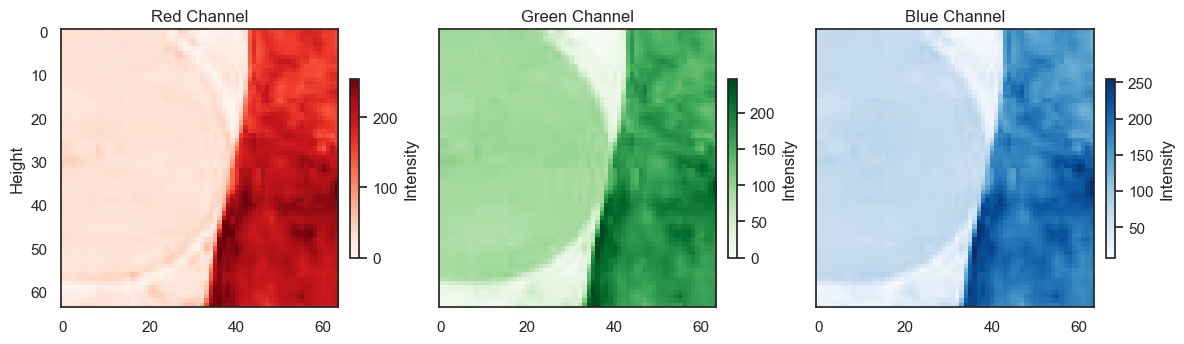

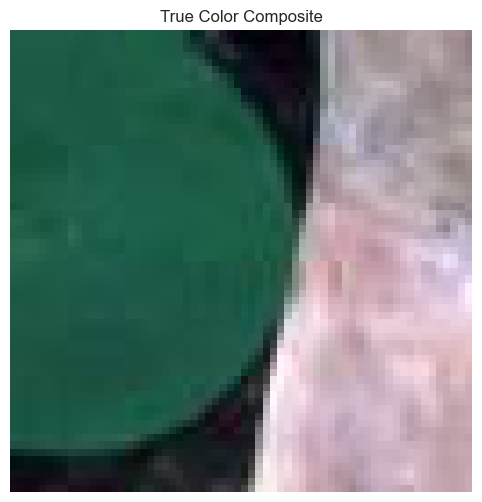

Category: Forest


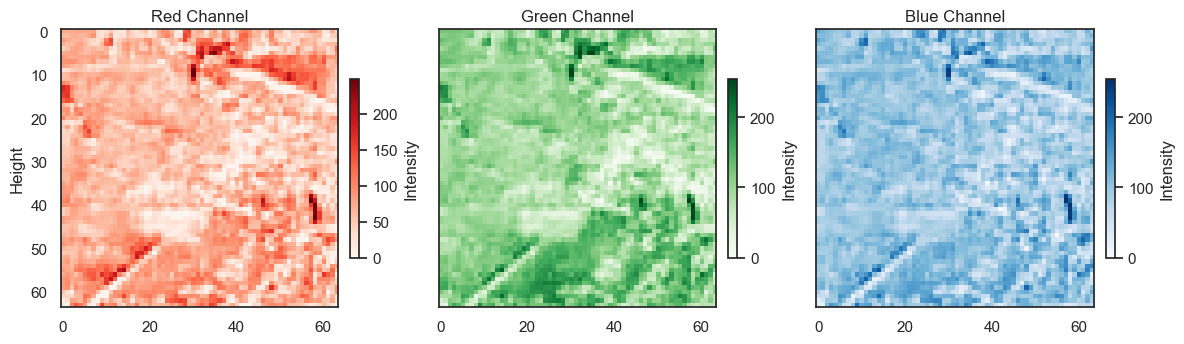

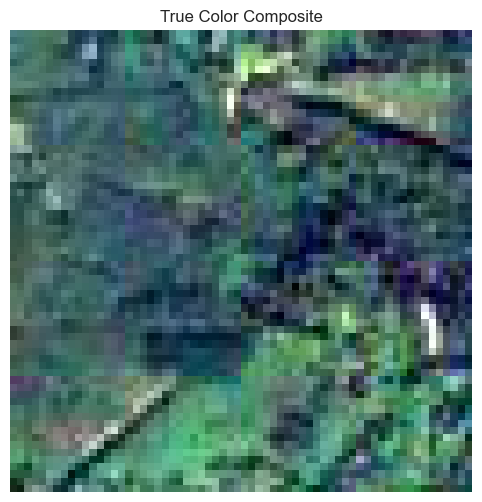

Category: HerbaceousVegetation


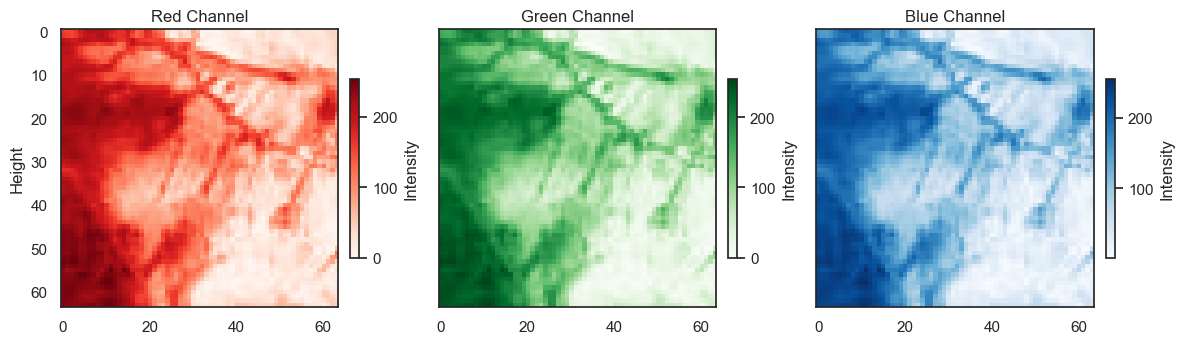

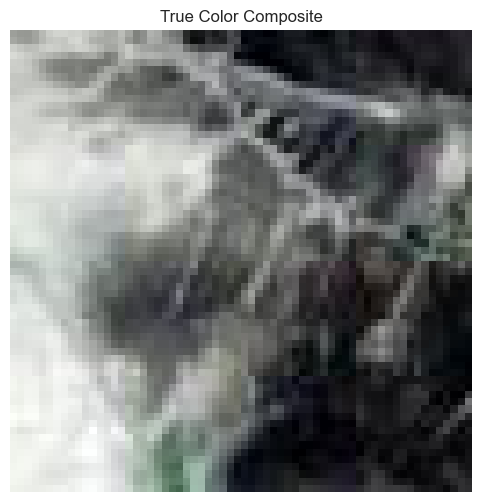

Category: Highway


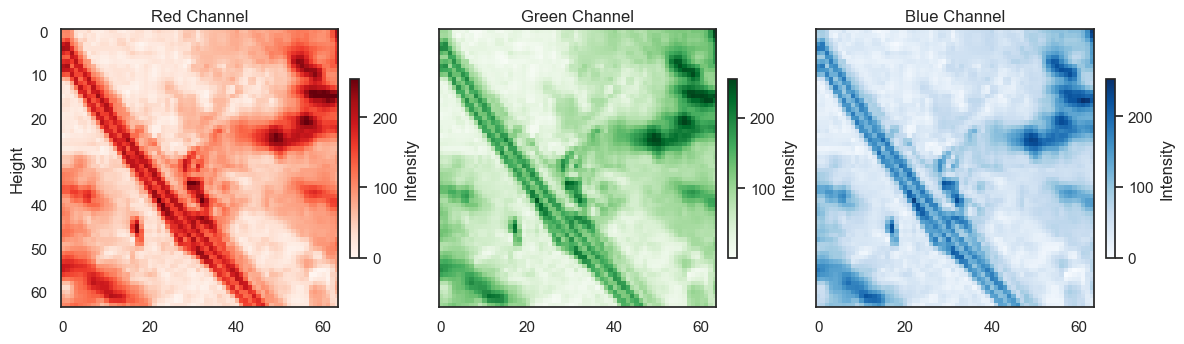

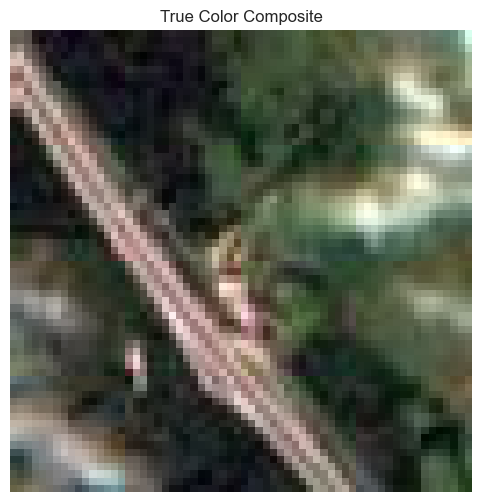

Category: Industrial


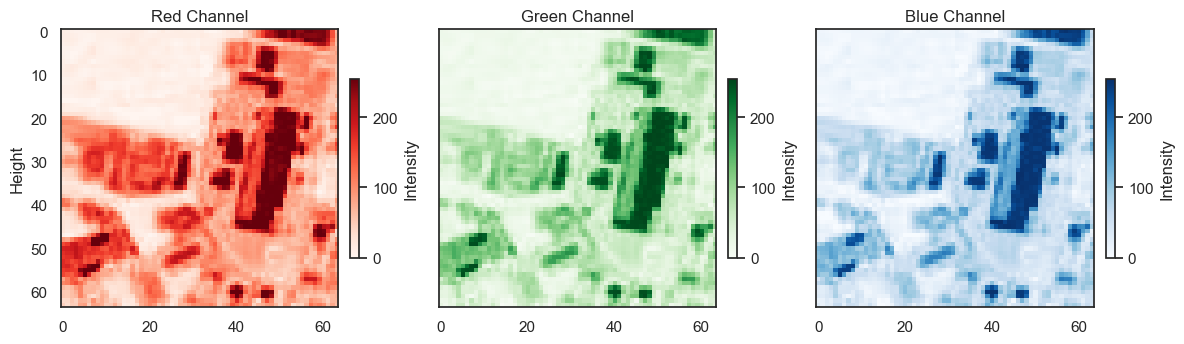

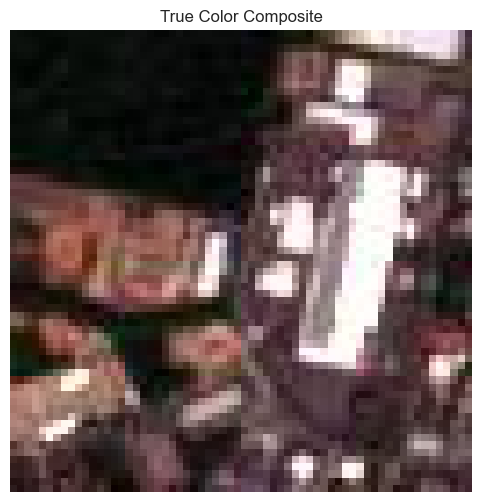

Category: Pasture


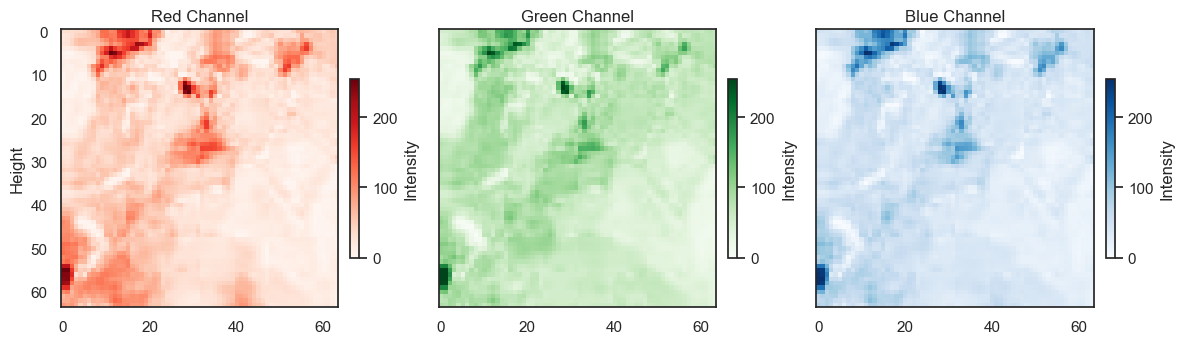

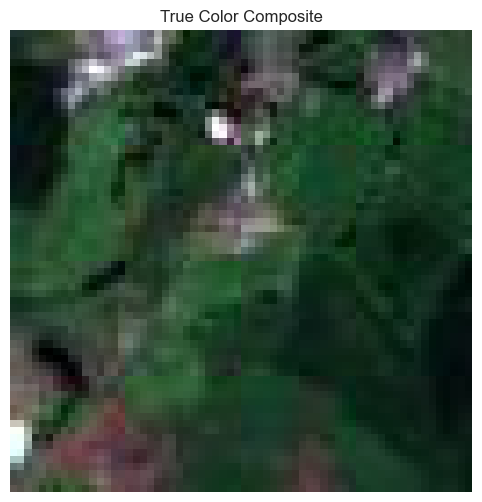

Category: PermanentCrop


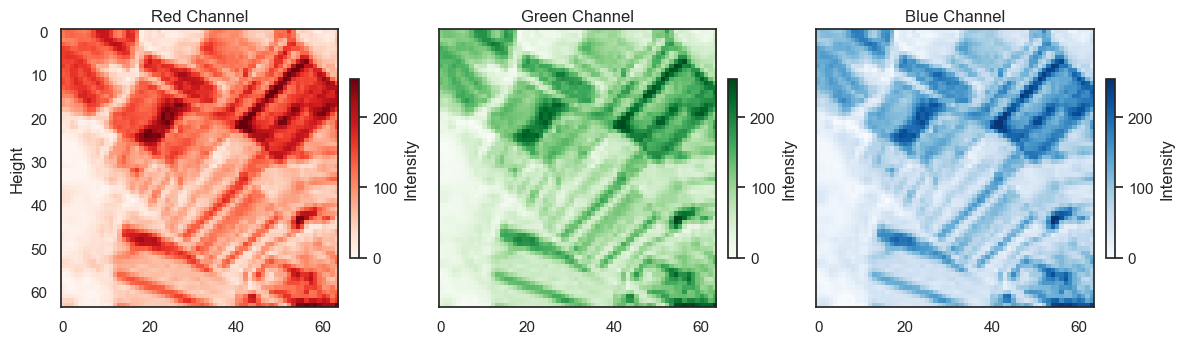

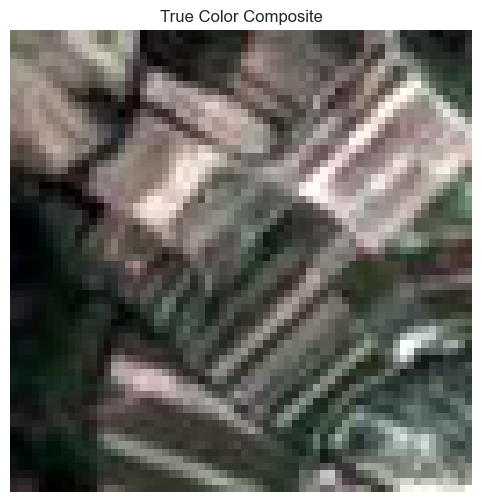

Category: Residential


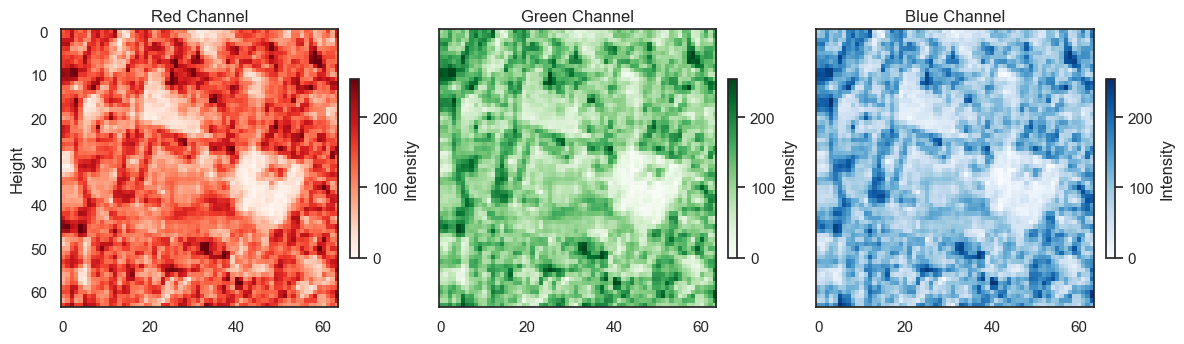

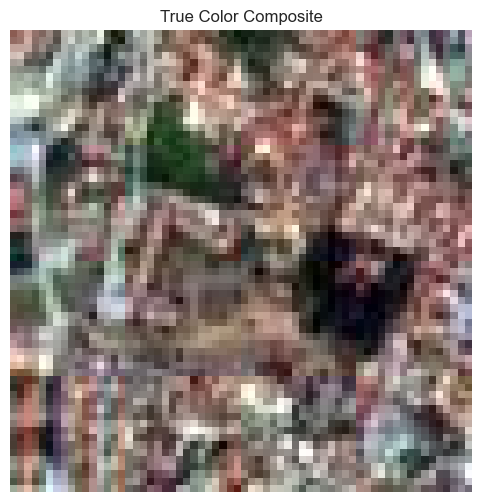

Category: River


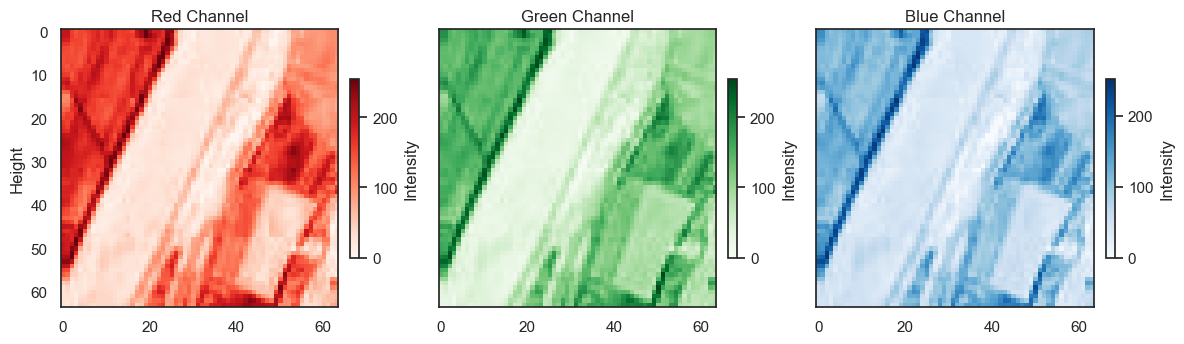

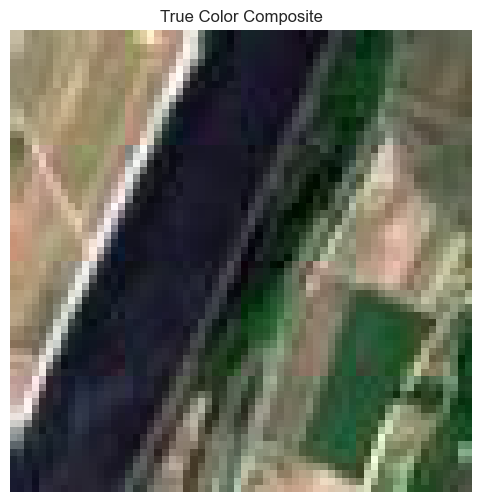

Category: SeaLake


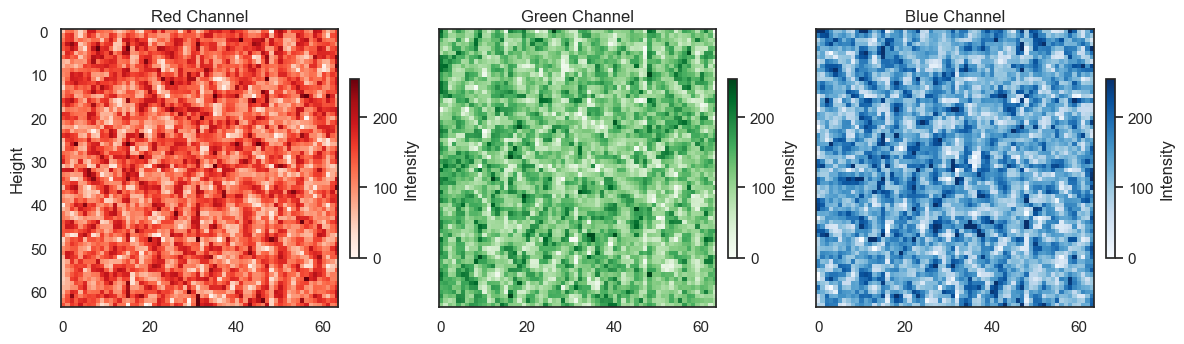

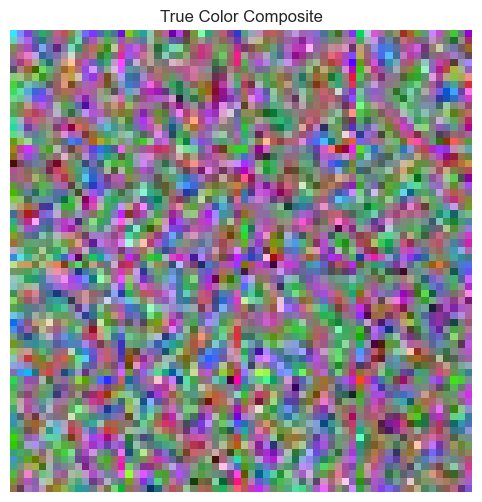

In [8]:
# Plotting outside the loop
for entry in rasters:
    raster = entry['raster']
    true_color_image = entry['true_color_image']
    img_path = entry['img_path']
    
    # Extract category from the image path
    category = img_path.split(os.sep)[-2]
    
    # Print category as header
    print(f"Category: {category}")
    
    # Plot Red, Green and Blue (RGB) channels
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(12, 4), sharey=True)
    
    # Plot Red channel
    ax1.imshow(true_color_image[:, :, 0], cmap='Reds')
    ax1.set_title("Red Channel")
    cbar1 = fig.colorbar(ax1.images[0], ax=ax1, orientation='vertical', fraction=0.03, pad=0.04)
    cbar1.set_label('Intensity')
    
    # Plot Green channel
    ax2.imshow(true_color_image[:, :, 1], cmap='Greens')
    ax2.set_title("Green Channel")
    cbar2 = fig.colorbar(ax2.images[0], ax=ax2, orientation='vertical', fraction=0.03, pad=0.04)
    cbar2.set_label('Intensity')
    
    # Plot Blue channel
    ax3.imshow(true_color_image[:, :, 2], cmap='Blues')
    ax3.set_title("Blue Channel")
    cbar3 = fig.colorbar(ax3.images[0], ax=ax3, orientation='vertical', fraction=0.03, pad=0.04)
    cbar3.set_label('Intensity')
    
    ax1.set_ylabel("Height")
    
    plt.tight_layout()
    plt.show()
    
    # Plot true color image
    plt.figure(figsize=(8, 6))
    plt.imshow(true_color_image)
    plt.title('True Color Composite')
    plt.axis('off')
    plt.show()

### Normalising and Storing RGB Bands from Raster Images

In [9]:
# List to store normalized bands and statistics
normalized_bands = []

# Iterate over each image path
for img_path in image_paths:
    # Open the image with rasterio
    with rasterio.open(img_path) as raster:
        # Print category as header
        category = img_path.split(os.sep)[-2]
        # Read RGB bands
        red = raster.read(1)  # Assuming band 1 is red
        green = raster.read(2)  # Assuming band 2 is green
        blue = raster.read(3)  # Assuming band 3 is blue
        
        # Function to normalize the grid values
        def normalize(array):
            """Normalizes numpy arrays into scale 0.0 - 1.0"""
            array_min, array_max = array.min(), array.max()
            return ((array - array_min)/(array_max - array_min))
        
        # Normalize the bands
        redn = normalize(red)
        greenn = normalize(green)
        bluen = normalize(blue)
        
        # Store normalized bands and statistics
        normalized_bands.append({
            'redn': redn,
            'greenn': greenn,
            'bluen': bluen,
            'redn_stats': (redn.min(), redn.max(), redn.mean()),
            'greenn_stats': (greenn.min(), greenn.max(), greenn.mean()),
            'bluen_stats': (bluen.min(), bluen.max(), bluen.mean()),
            'img_path': img_path  # Store image path for reference
        })

# Print normalized statistics for each raster
for idx, bands in enumerate(normalized_bands, start=1):
    print(f"Raster {idx} Normalized Bands Statistics:")
    print(f"Red: {bands['redn_stats'][0]} - {bands['redn_stats'][1]}, mean: {bands['redn_stats'][2]}")
    print(f"Green: {bands['greenn_stats'][0]} - {bands['greenn_stats'][1]}, mean: {bands['greenn_stats'][2]}")
    print(f"Blue: {bands['bluen_stats'][0]} - {bands['bluen_stats'][1]}, mean: {bands['bluen_stats'][2]}")
    print()

Raster 1 Normalized Bands Statistics:
Red: 0.0 - 1.0, mean: 0.3641189874387255
Green: 0.0 - 1.0, mean: 0.4627888173709514
Blue: 0.0 - 1.0, mean: 0.4102096248734818

Raster 2 Normalized Bands Statistics:
Red: 0.0 - 1.0, mean: 0.2630531893197791
Green: 0.0 - 1.0, mean: 0.39778741574754906
Blue: 0.0 - 1.0, mean: 0.38230219822303924

Raster 3 Normalized Bands Statistics:
Red: 0.0 - 1.0, mean: 0.43603996216781493
Green: 0.0 - 1.0, mean: 0.44442497702205885
Blue: 0.0 - 1.0, mean: 0.43593479804841895

Raster 4 Normalized Bands Statistics:
Red: 0.0 - 1.0, mean: 0.323876953125
Green: 0.0 - 1.0, mean: 0.3298822335103755
Blue: 0.0 - 1.0, mean: 0.2861550071022727

Raster 5 Normalized Bands Statistics:
Red: 0.0 - 1.0, mean: 0.3592878753063726
Green: 0.0 - 1.0, mean: 0.288394224877451
Blue: 0.0 - 1.0, mean: 0.28124138327205883

Raster 6 Normalized Bands Statistics:
Red: 0.0 - 1.0, mean: 0.16199448529411764
Green: 0.0 - 1.0, mean: 0.2502374387254902
Blue: 0.0 - 1.0, mean: 0.18469860600490196

Raster 

### Visualising RGB Natural Colour Composites

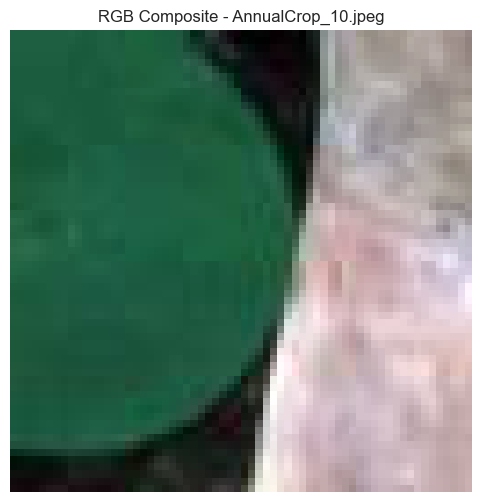

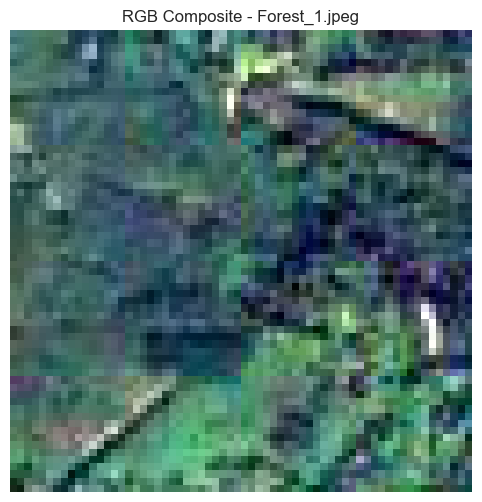

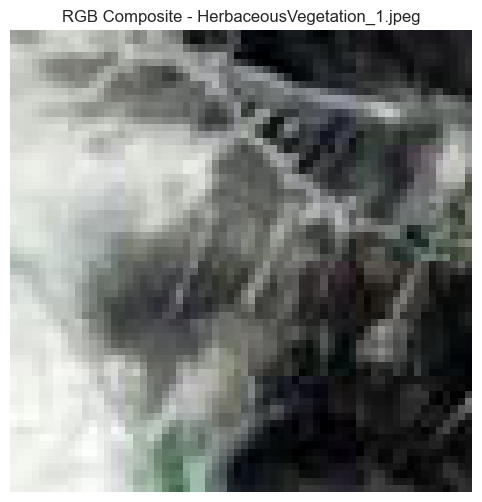

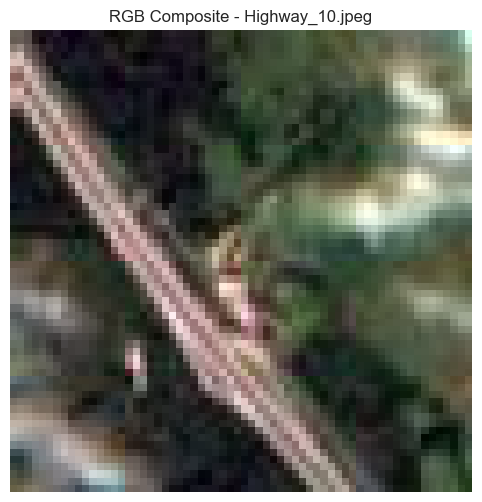

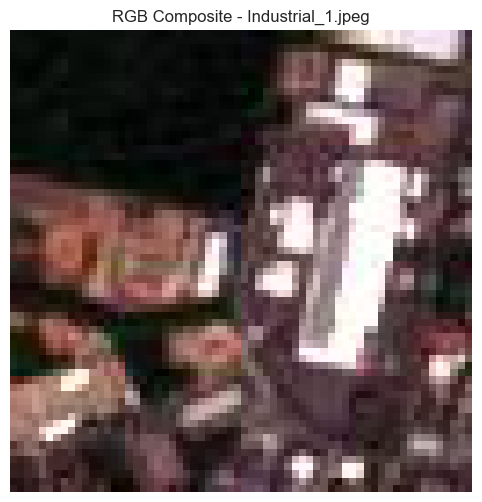

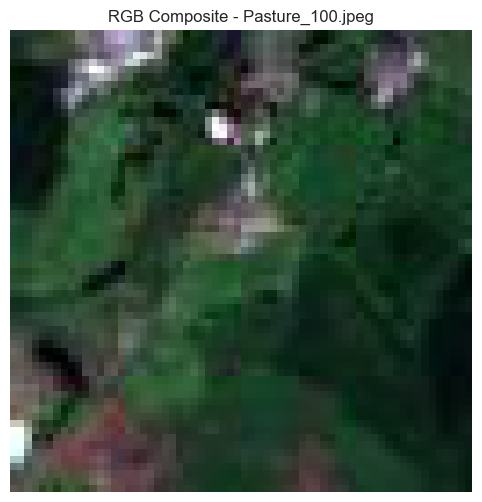

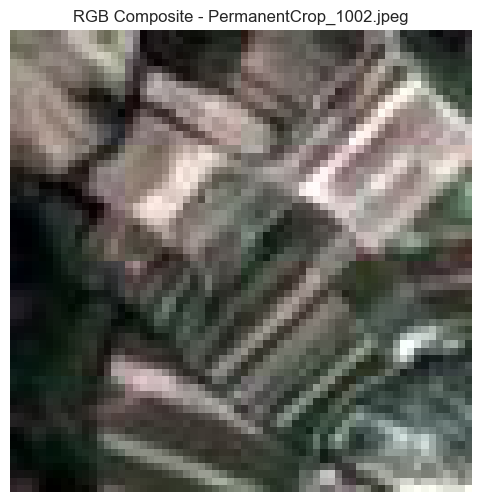

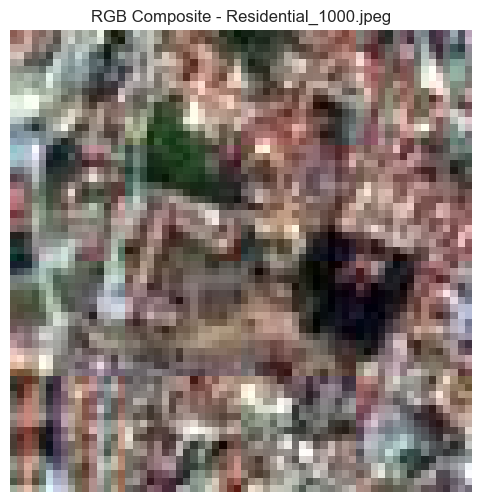

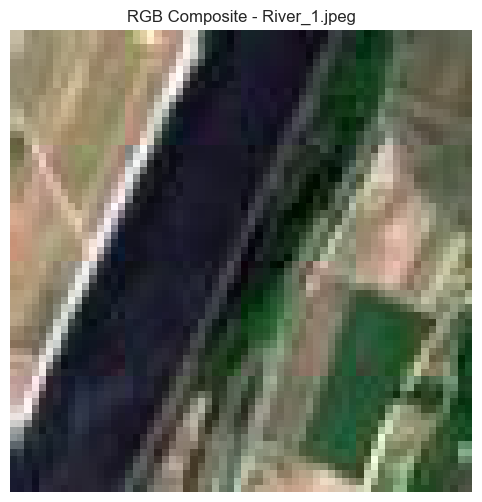

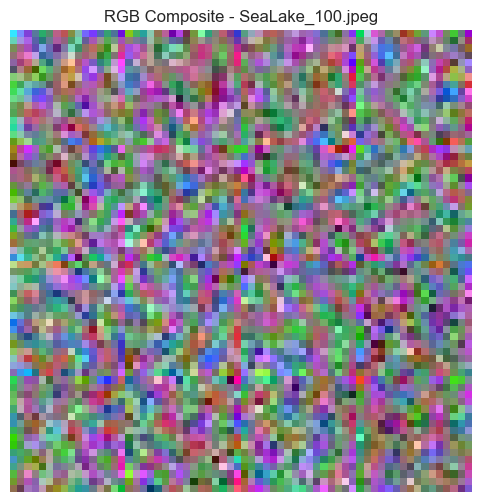

In [10]:
# Create RGB natural color composites and visualize
for idx, bands in enumerate(normalized_bands, start=1):
    redn = bands['redn']
    greenn = bands['greenn']
    bluen = bands['bluen']
    img_path = bands['img_path']
    
    # Create RGB natural color composite
    rgb = np.dstack((redn, greenn, bluen))
    
    # Plot the RGB composite
    plt.figure(figsize=(8, 6))
    plt.imshow(rgb)
    plt.title(f'RGB Composite - {os.path.basename(img_path)}')
    plt.axis('off')
    plt.show()

### Normalising the Bands and Processing the Rasters

Category: AnnualCrop


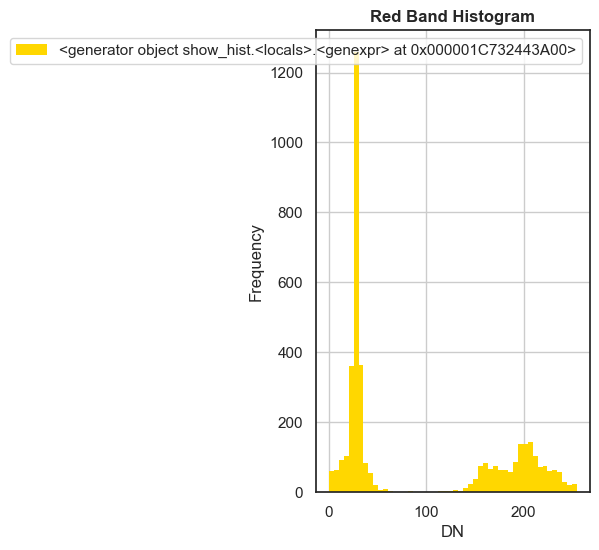

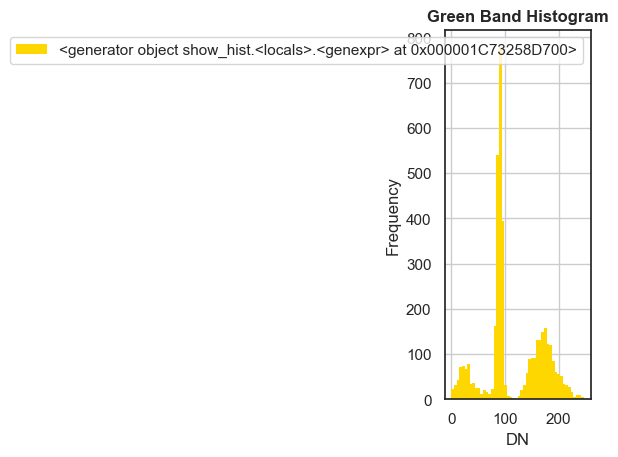

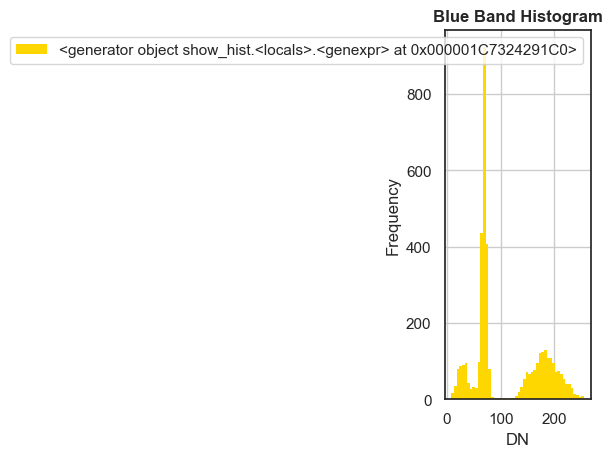

<Figure size 640x480 with 0 Axes>

Category: Forest


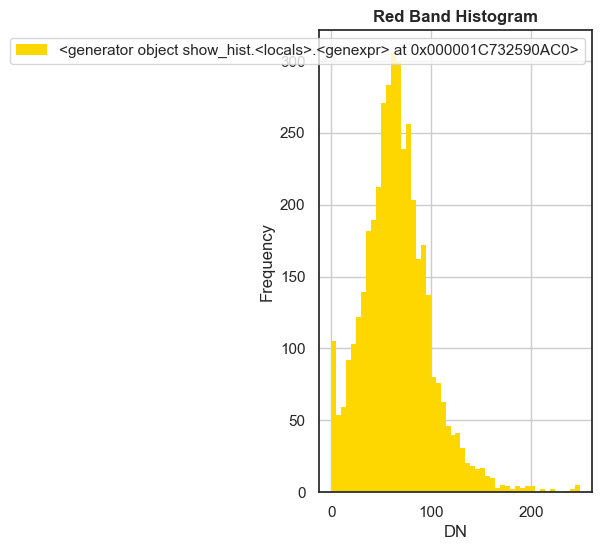

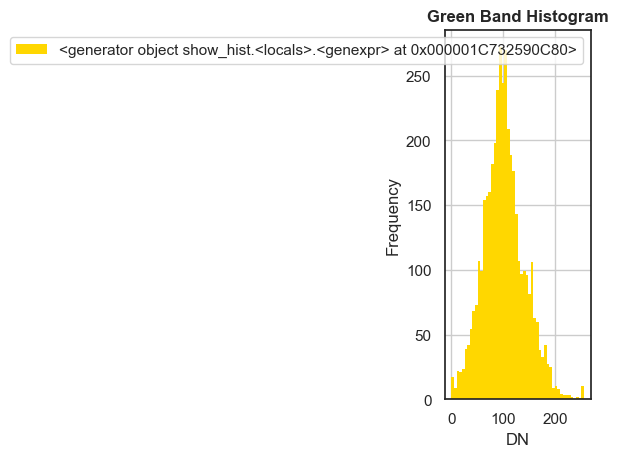

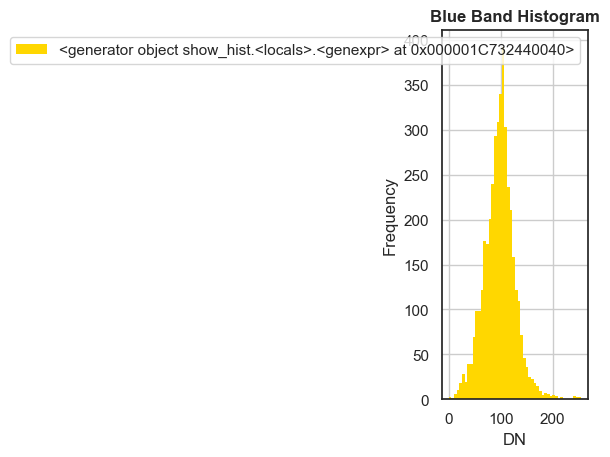

<Figure size 640x480 with 0 Axes>

Category: HerbaceousVegetation


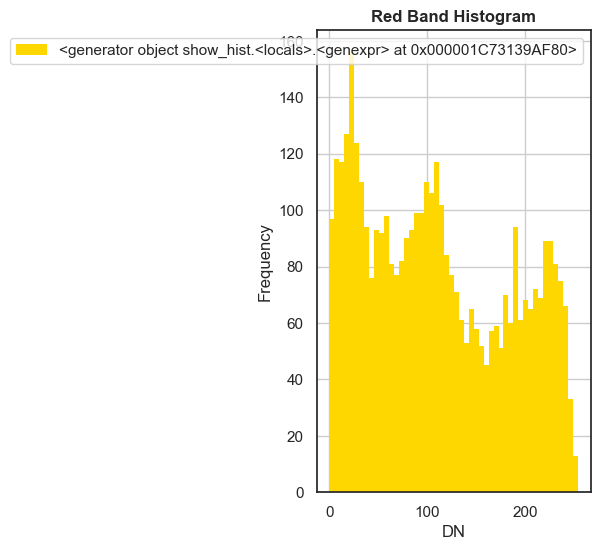

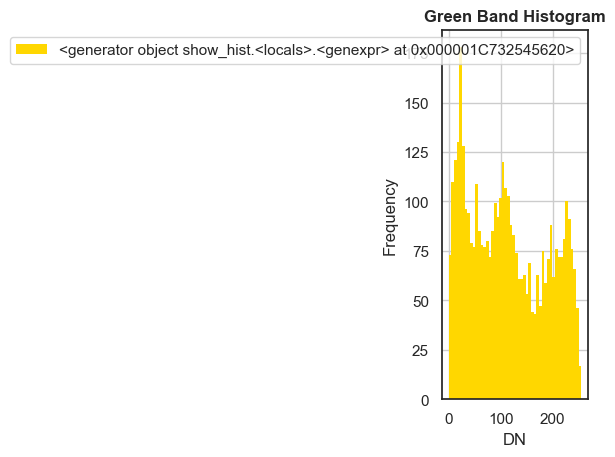

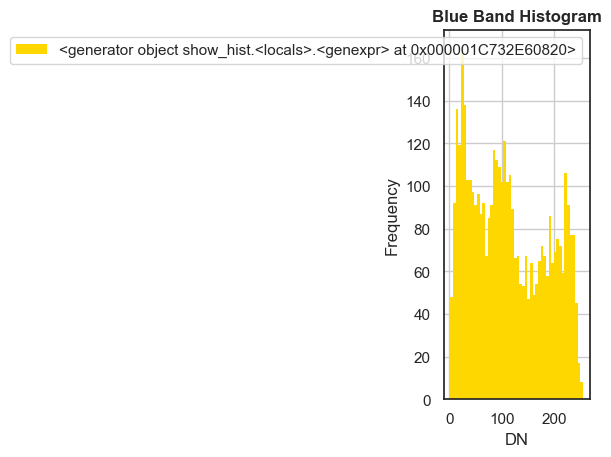

<Figure size 640x480 with 0 Axes>

Category: Highway


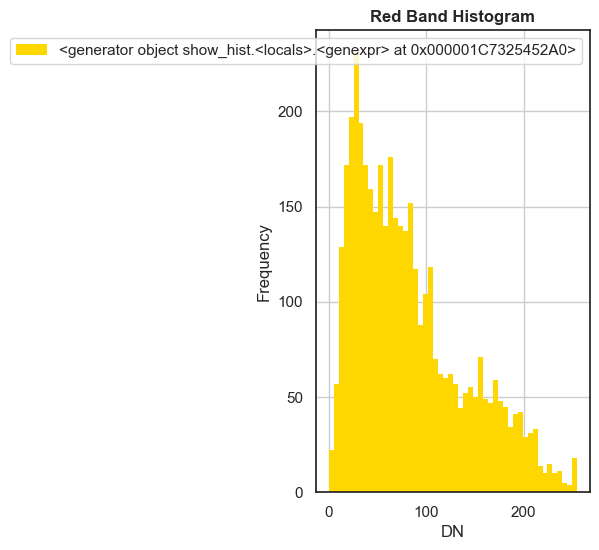

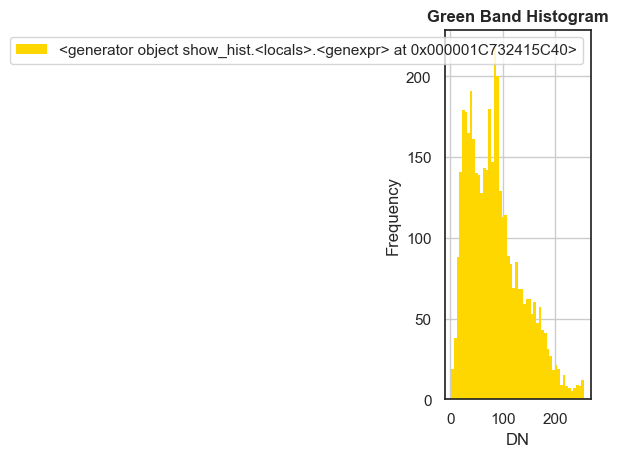

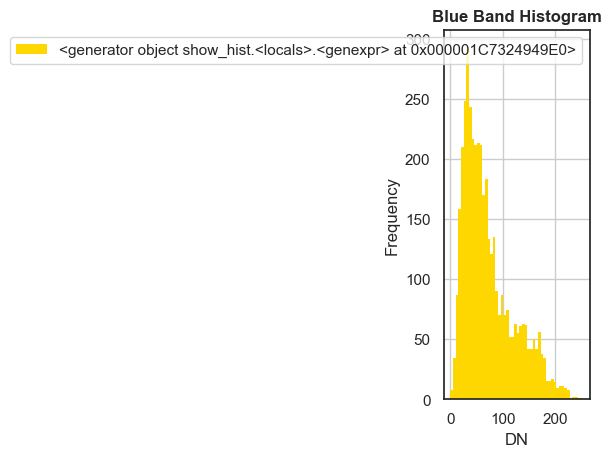

<Figure size 640x480 with 0 Axes>

Category: Industrial


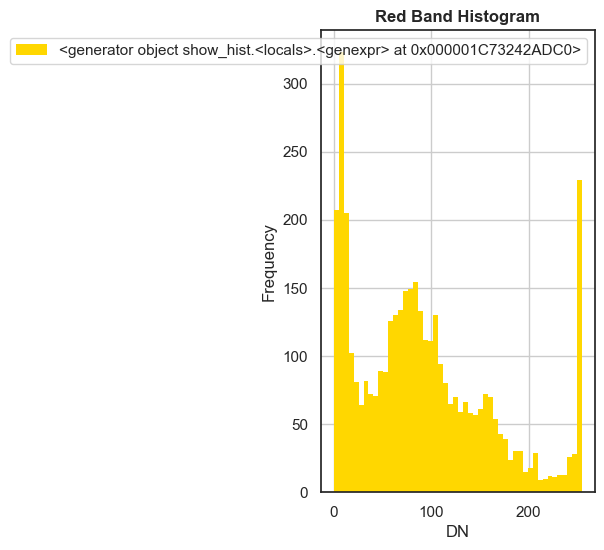

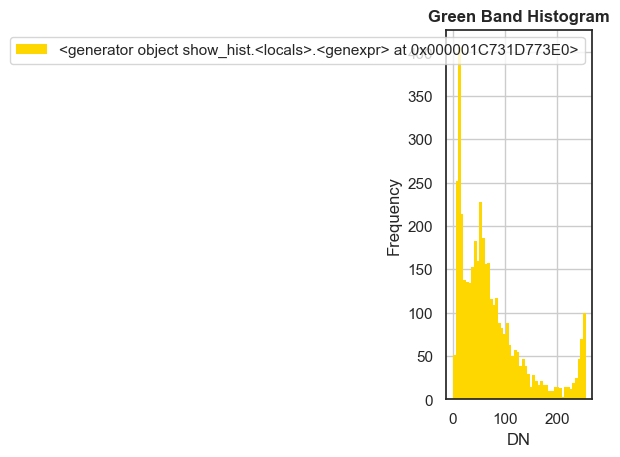

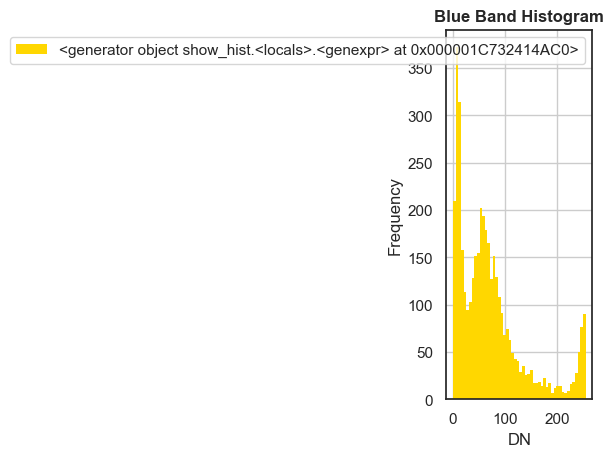

<Figure size 640x480 with 0 Axes>

Category: Pasture


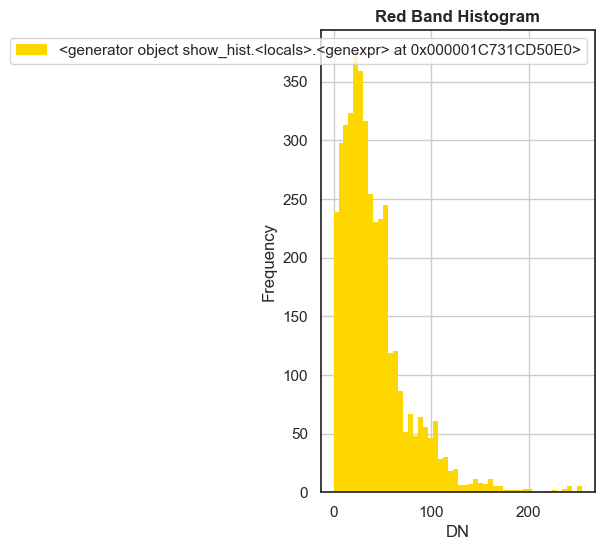

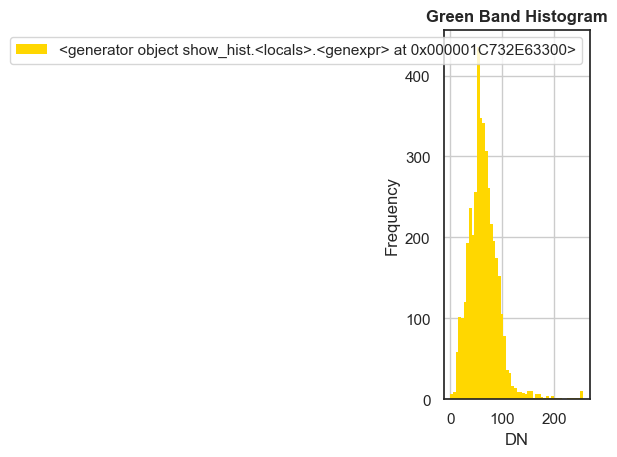

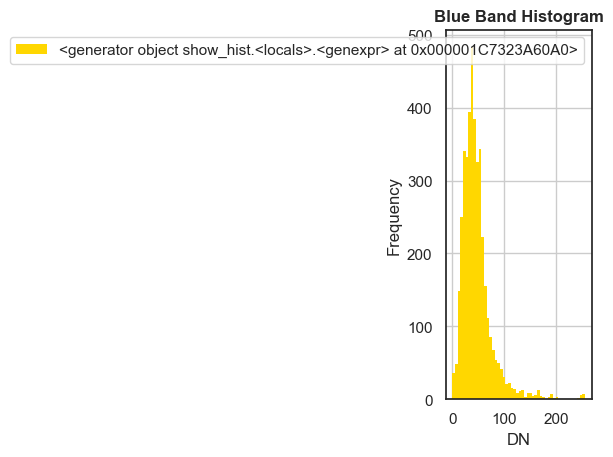

<Figure size 640x480 with 0 Axes>

Category: PermanentCrop


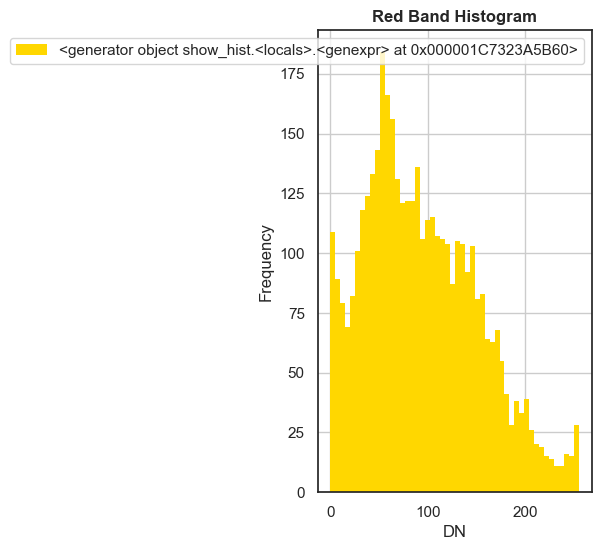

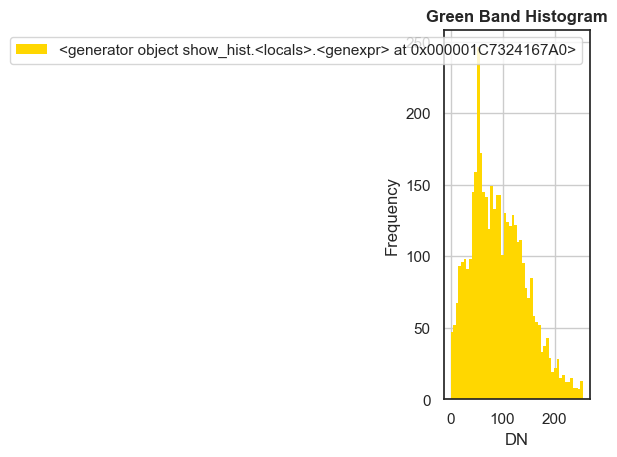

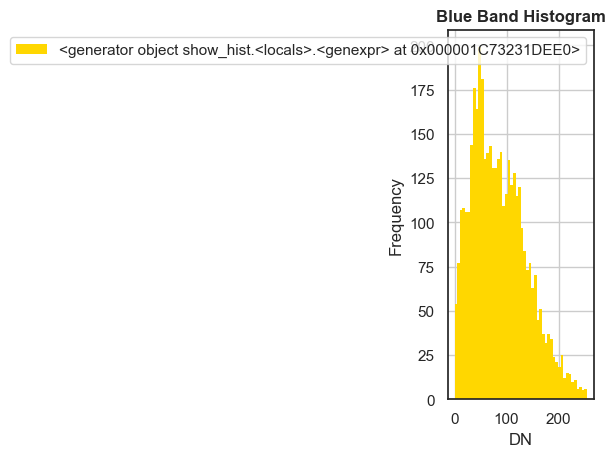

<Figure size 640x480 with 0 Axes>

Category: Residential


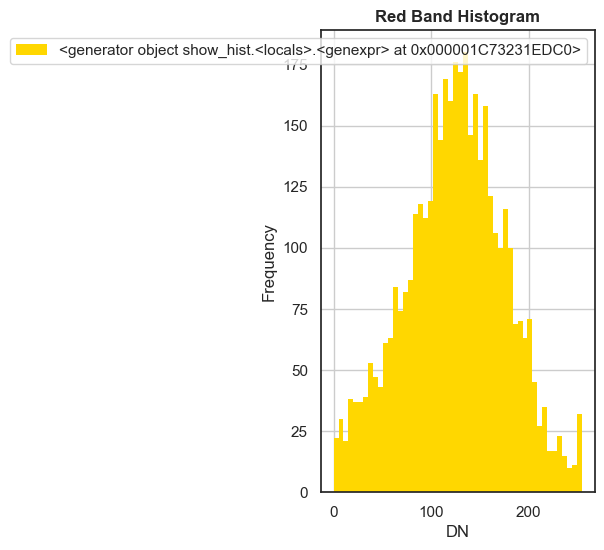

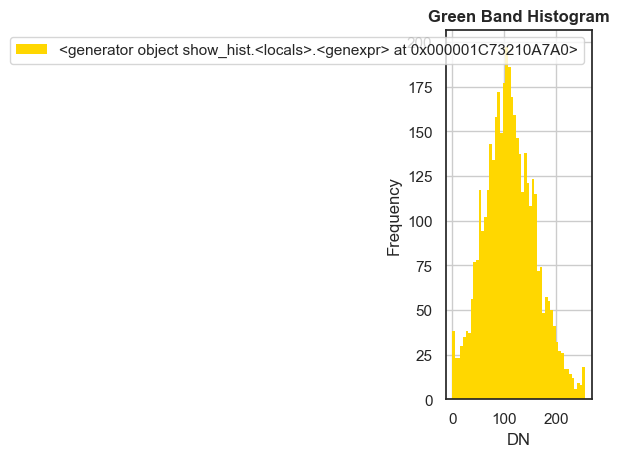

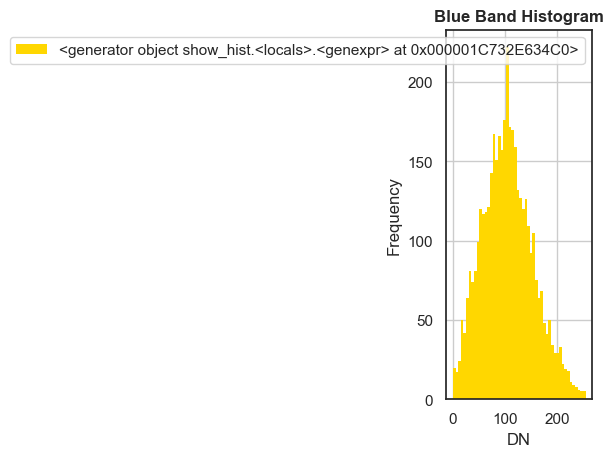

<Figure size 640x480 with 0 Axes>

Category: River


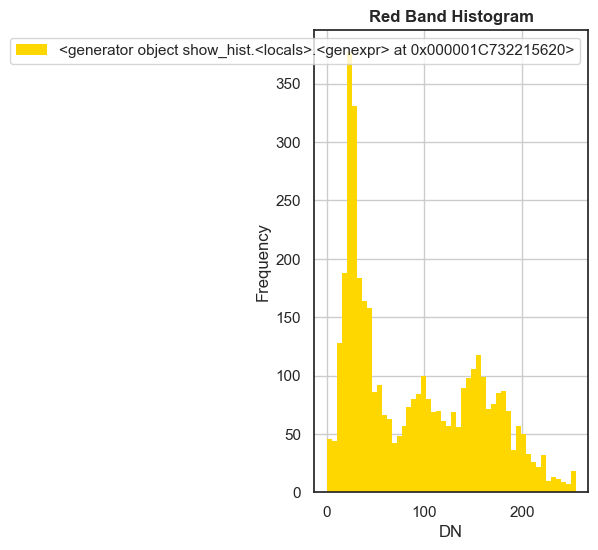

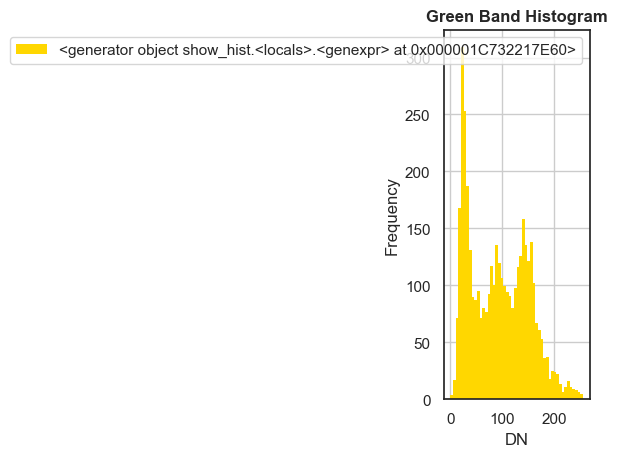

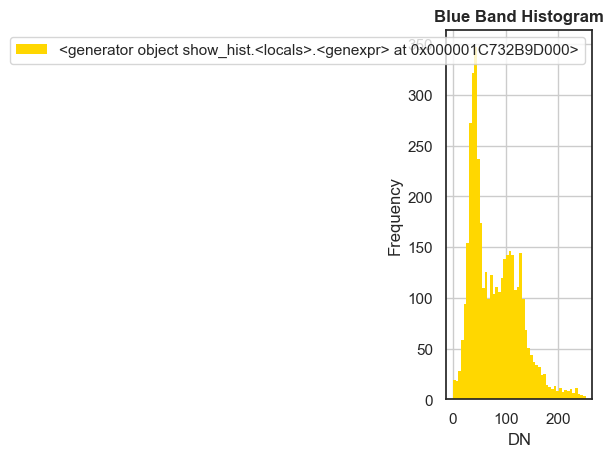

<Figure size 640x480 with 0 Axes>

Category: SeaLake


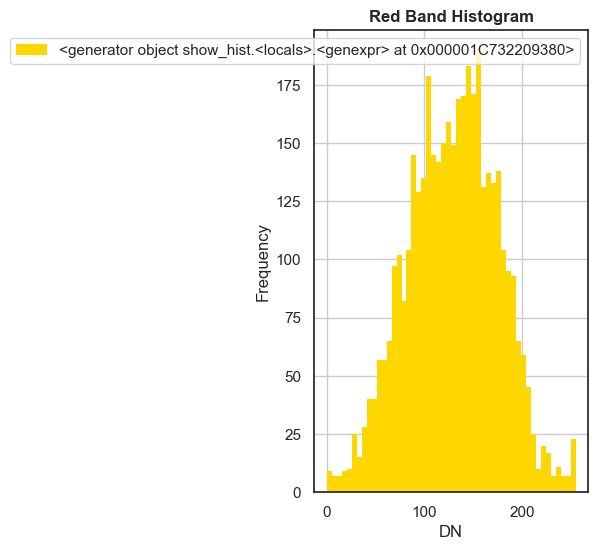

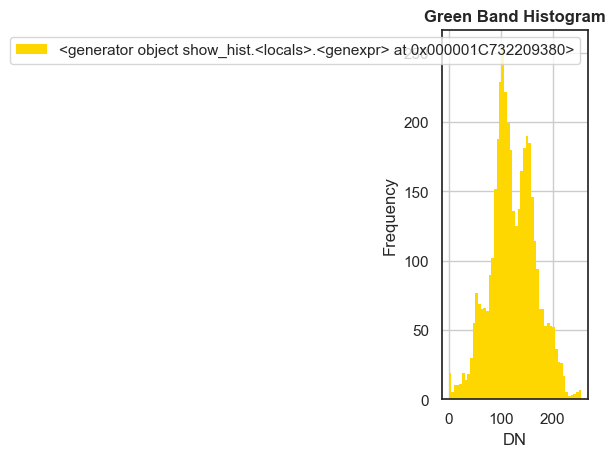

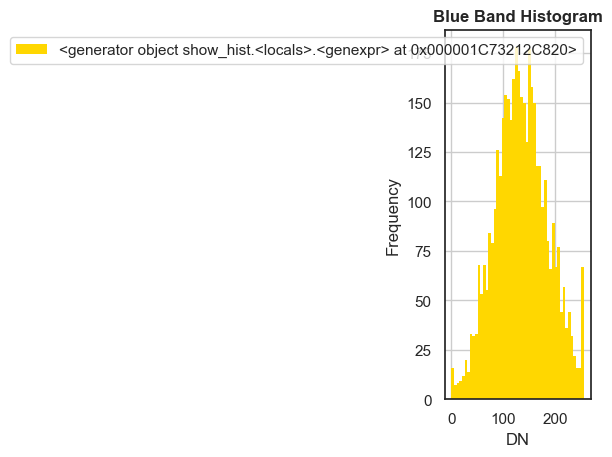

<Figure size 640x480 with 0 Axes>

In [11]:
# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Function to process each raster
def process_raster(img_path):
    with rasterio.open(img_path) as raster:
        # Read RGB bands
        red = raster.read(1) 
        green = raster.read(2) 
        blue = raster.read(3)  
    
        # Normalize the bands using the normalize function
        redn = normalize(red)
        greenn = normalize(green)
        bluen = normalize(blue)
        
        # Store normalized bands and statistics in a dictionary
        stats = {
            'redn': redn,
            'greenn': greenn,
            'bluen': bluen,
            'redn_stats': (redn.min(), redn.max(), redn.mean()),
            'greenn_stats': (greenn.min(), greenn.max(), greenn.mean()),
            'bluen_stats': (bluen.min(), bluen.max(), bluen.mean()),
            'img_path': img_path  # Store image path for reference
        }
        
        # Plot histograms for each band
        plt.figure(figsize=(12, 6))
        
        # Histogram for Red band
        plt.subplot(1, 3, 1)
        show_hist(red, bins=50, lw=0.0, stacked=False,
                  histtype='stepfilled', title="Red Band Histogram")
        
        # Histogram for Green band
        plt.subplot(1, 3, 2)
        show_hist(green, bins=50, lw=0.0, stacked=False,
                  histtype='stepfilled', title="Green Band Histogram")
        
        # Histogram for Blue band
        plt.subplot(1, 3, 3)
        show_hist(blue, bins=50, lw=0.0, stacked=False,
                  histtype='stepfilled', title="Blue Band Histogram")
        
        plt.tight_layout()
        plt.show()
        
        return stats

# List to store normalized bands and statistics
normalized_bands = []

# Process each raster image in the rasters list
for idx, entry in enumerate(rasters, start=1):
    img_path = entry['img_path']
    category = img_path.split(os.sep)[-2]
    print(f"Category: {category}")
    
    # Process raster and append its statistics to normalized_bands
    stats = process_raster(img_path)
    normalized_bands.append(stats)
